#### https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

train_df = pd.read_csv('/Users/babamalik/Desktop/Data_Scientist/Store Sales - Time Series Forecasting/data/train.csv', parse_dates=["date"])
test_df = pd.read_csv("/Users/babamalik/Desktop/Data_Scientist/Store Sales - Time Series Forecasting/data/test.csv", parse_dates=["date"])
stores_df = pd.read_csv("/Users/babamalik/Desktop/Data_Scientist/Store Sales - Time Series Forecasting/data/stores.csv")
oil_df = pd.read_csv("/Users/babamalik/Desktop/Data_Scientist/Store Sales - Time Series Forecasting/data/oil.csv", parse_dates=["date"])
holidays_df = pd.read_csv("/Users/babamalik/Desktop/Data_Scientist/Store Sales - Time Series Forecasting/data/holidays_events.csv", parse_dates=["date"])
transactions_df = pd.read_csv("/Users/babamalik/Desktop/Data_Scientist/Store Sales - Time Series Forecasting/data/transactions.csv", parse_dates=["date"])

In [2]:
# Display basic info
print(train_df.head())
print(train_df.info())

   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None


In [3]:
train_df['family'].nunique()
# 'nunique()': Use this method when you only need the count of unique values.

33

In [4]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [5]:
# Merge transactions into train data
train_df = train_df.merge(transactions_df, on=["date", "store_nbr"], how="left")

In [6]:
train_df['transactions'].count()

np.int64(2755104)

In [7]:
train_df['transactions'].isna().sum()

np.int64(245784)

In [8]:
len(train_df['transactions'])

3000888

In [9]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN


In [10]:
# Fill missing transaction values (if any) with the median
train_df["transactions"].fillna(train_df["transactions"].median(), inplace=True)

/var/folders/nv/hf6t5yfd0_75lf4kc1jtwh7m0000gn/T/ipykernel_18886/187478240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["transactions"].fillna(train_df["transactions"].median(), inplace=True)


In [11]:
train_df['transactions'].unique()

array([1393.,  770., 2111., ..., 4553., 4400., 4392.])

In [12]:
# Check if the merge was successful
print("Merged Data:\n", train_df.head())

Merged Data:
    id       date  store_nbr      family  sales  onpromotion  transactions
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0        1393.0
1   1 2013-01-01          1   BABY CARE    0.0            0        1393.0
2   2 2013-01-01          1      BEAUTY    0.0            0        1393.0
3   3 2013-01-01          1   BEVERAGES    0.0            0        1393.0
4   4 2013-01-01          1       BOOKS    0.0            0        1393.0


In [13]:
train_df = train_df.merge(oil_df, on="date", how="left")

In [14]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1393.0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,1393.0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,1393.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,1393.0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,1393.0,NaN


In [15]:
#train_df = train_df.drop(['dcoilwtico_x', 'dcoilwtico_y'], axis=1)

In [16]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1393.0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,1393.0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,1393.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,1393.0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,1393.0,NaN


In [17]:
train_df['dcoilwtico'].unique()

array([   nan,  93.14,  92.97,  93.12,  93.2 ,  93.21,  93.08,  93.81,
        93.6 ,  94.27,  93.26,  94.28,  95.49,  95.61,  96.09,  95.06,
        95.35,  95.15,  95.95,  97.62,  97.98,  97.65,  97.46,  96.21,
        96.68,  96.44,  95.84,  95.71,  97.01,  97.48,  97.03,  97.3 ,
        96.69,  94.92,  92.79,  92.74,  92.63,  92.84,  92.03,  90.71,
        90.13,  90.88,  90.47,  91.53,  92.01,  92.07,  92.44,  92.47,
        93.03,  93.49,  93.71,  92.46,  93.41,  94.55,  95.99,  96.53,
        97.24,  97.1 ,  97.23,  95.02,  92.76,  93.36,  94.18,  94.59,
        93.44,  91.23,  88.75,  88.73,  86.65,  87.83,  88.04,  88.81,
        89.21,  91.07,  93.27,  94.09,  93.22,  90.74,  93.7 ,  95.25,
        95.8 ,  95.28,  96.24,  95.81,  94.76,  93.96,  93.95,  94.85,
        95.72,  96.29,  95.55,  93.98,  94.12,  93.84,  94.65,  93.13,
        93.57,  91.93,  93.66,  94.71,  96.11,  95.82,  95.5 ,  95.98,
        96.66,  97.83,  97.86,  98.46,  98.24,  94.89,  95.07,  95.47,
      

In [18]:
train_df['dcoilwtico'].nunique()

994

In [19]:
# Fill missing oil prices using forward fill
train_df["dcoilwtico"] = train_df["dcoilwtico"].ffill()

In [20]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1393.0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,1393.0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,1393.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,1393.0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,1393.0,NaN


In [21]:
print(train_df["dcoilwtico"].isnull().sum()) 

1782


In [22]:
train_df["dcoilwtico"] = train_df["dcoilwtico"].ffill().bfill()

In [23]:
print(train_df["dcoilwtico"].isnull().sum()) 

0


In [24]:
# Merge holidays data
train_df = train_df.merge(holidays_df[["date", "type"]], on="date", how="left")

In [25]:
train_df["type"] = train_df["type"].fillna("No Holiday")

In [26]:
print(train_df["type"].isnull().sum())

0


In [27]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,type
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1393.0,93.14,Holiday
1,1,2013-01-01,1,BABY CARE,0.0,0,1393.0,93.14,Holiday
2,2,2013-01-01,1,BEAUTY,0.0,0,1393.0,93.14,Holiday
3,3,2013-01-01,1,BEVERAGES,0.0,0,1393.0,93.14,Holiday
4,4,2013-01-01,1,BOOKS,0.0,0,1393.0,93.14,Holiday


In [28]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [29]:
# Merge store metadata
train_df = train_df.merge(stores_df, on="store_nbr", how="left")

In [30]:
# Check final merged dataset
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,type_x,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13


In [31]:
# Rename type_y to store_type
train_df.rename(columns={"type_x": "holiday_type", "type_y": "store_type"}, inplace=True)

In [32]:
# Check the final merged dataset
train_df.head()


,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,holiday_type,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,D,13


# Feature Engineering

In [33]:
# Extract Date Features
train_df["year"] = train_df["date"].dt.year
train_df["month"] = train_df["date"].dt.month
train_df["day"] = train_df["date"].dt.day
train_df["weekday"] = train_df["date"].dt.weekday  # Monday = 0, Sunday = 6
train_df["is_weekend"] = (train_df["weekday"] >= 5).astype(int)  # 1 if Sat/Sun, else 0

In [34]:
train_df.tail()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,holiday_type,city,state,store_type,cluster,year,month,day,weekday,is_weekend
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,2155.0,47.57,Holiday,Quito,Pichincha,B,6,2017,8,15,1,0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2155.0,47.57,Holiday,Quito,Pichincha,B,6,2017,8,15,1,0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,2155.0,47.57,Holiday,Quito,Pichincha,B,6,2017,8,15,1,0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.0,47.57,Holiday,Quito,Pichincha,B,6,2017,8,15,1,0
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,2155.0,47.57,Holiday,Quito,Pichincha,B,6,2017,8,15,1,0


In [35]:
train_df['holiday_type'].unique()

array(['Holiday', 'No Holiday', 'Work Day', 'Additional', 'Event',
       'Transfer', 'Bridge'], dtype=object)

In [36]:

# Feature: Sales per Transaction
train_df["sales_per_transaction"] = train_df["sales"] / train_df["transactions"]
train_df["sales_per_transaction"].fillna(0)  # Fill missing values


0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
3054343    0.203310
3054344    0.071718
3054345    1.122844
3054346    0.056148
3054347    0.007425
Name: sales_per_transaction, Length: 3054348, dtype: float64

In [37]:
# Encode Holiday Type (Convert Categorical Data to Numeric)
# train_df["holiday_flag"] = train_df["holiday_type"].apply(lambda x: 1 if x != "No Holiday" else 0)

# Drop unnecessary columns
# train_df.drop(columns=["type"], inplace=True)


# One-hot encode store_type (D, C, B, A)
train_df = pd.get_dummies(train_df, columns=["store_type"], drop_first=True)


In [38]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'transactions', 'dcoilwtico', 'holiday_type', 'city', 'state',
       'cluster', 'year', 'month', 'day', 'weekday', 'is_weekend',
       'sales_per_transaction', 'store_type_B', 'store_type_C', 'store_type_D',
       'store_type_E'],
      dtype='object')

In [39]:
print(train_df[["store_type_B", "store_type_C", "store_type_D", "store_type_E"]].sum())


store_type_B     452496
store_type_C     848430
store_type_D    1018116
store_type_E     226248
dtype: int64


In [40]:
train_df.drop(columns=["id", "family", "date"], inplace=True)

In [41]:
train_df.head()

,store_nbr,sales,onpromotion,transactions,dcoilwtico,holiday_type,city,state,cluster,year,month,day,weekday,is_weekend,sales_per_transaction,store_type_B,store_type_C,store_type_D,store_type_E
0,1,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,13,2013,1,1,1,0,0.0,False,False,True,False
1,1,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,13,2013,1,1,1,0,0.0,False,False,True,False
2,1,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,13,2013,1,1,1,0,0.0,False,False,True,False
3,1,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,13,2013,1,1,1,0,0.0,False,False,True,False
4,1,0.0,0,1393.0,93.14,Holiday,Quito,Pichincha,13,2013,1,1,1,0,0.0,False,False,True,False


# Data Visualization

### Plot Sales Over Time

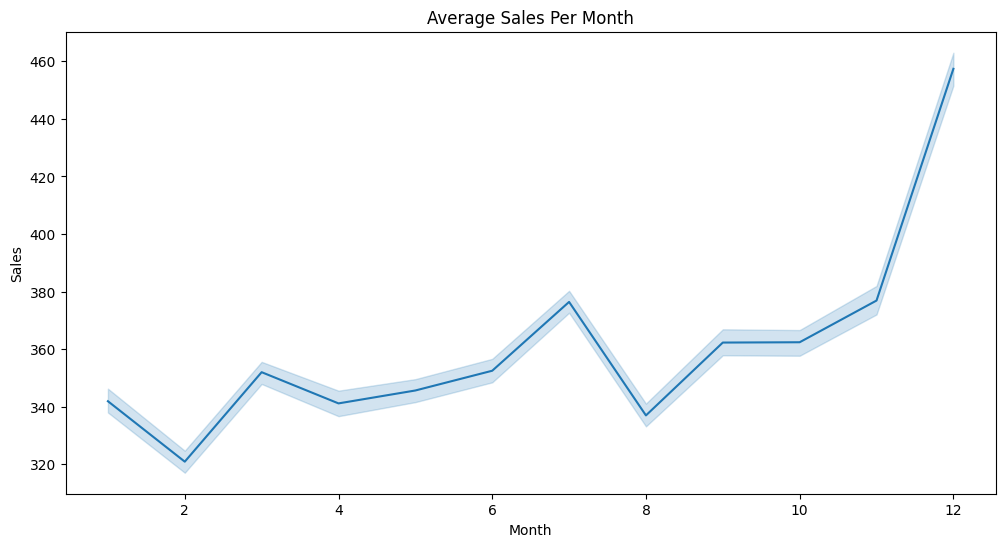

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=train_df["month"], y=train_df["sales"], estimator="mean")
plt.title("Average Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### Sales vs. Transactions

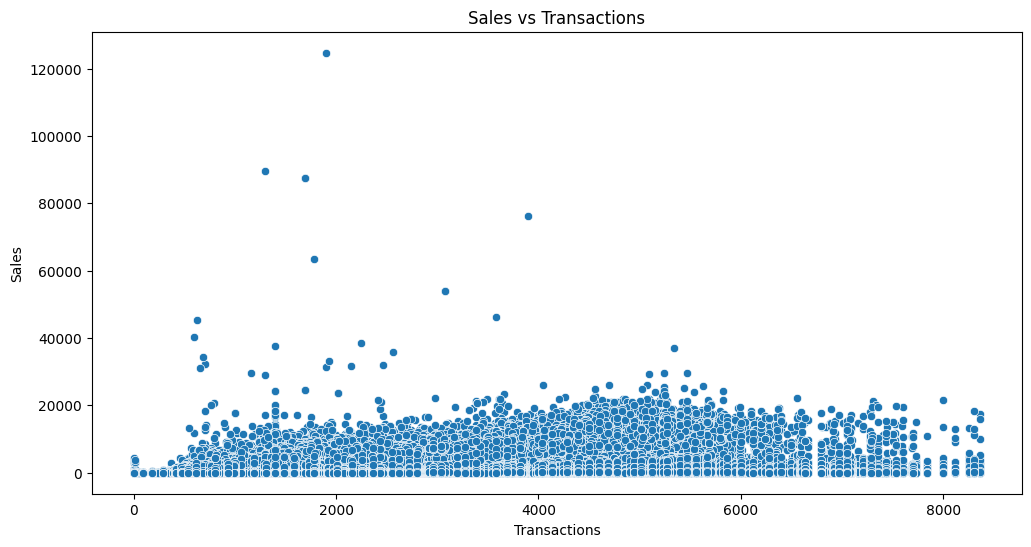

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df["transactions"], y=train_df["sales"])
plt.title("Sales vs Transactions")
plt.xlabel("Transactions")
plt.ylabel("Sales")
plt.show()


### Sales Distribution

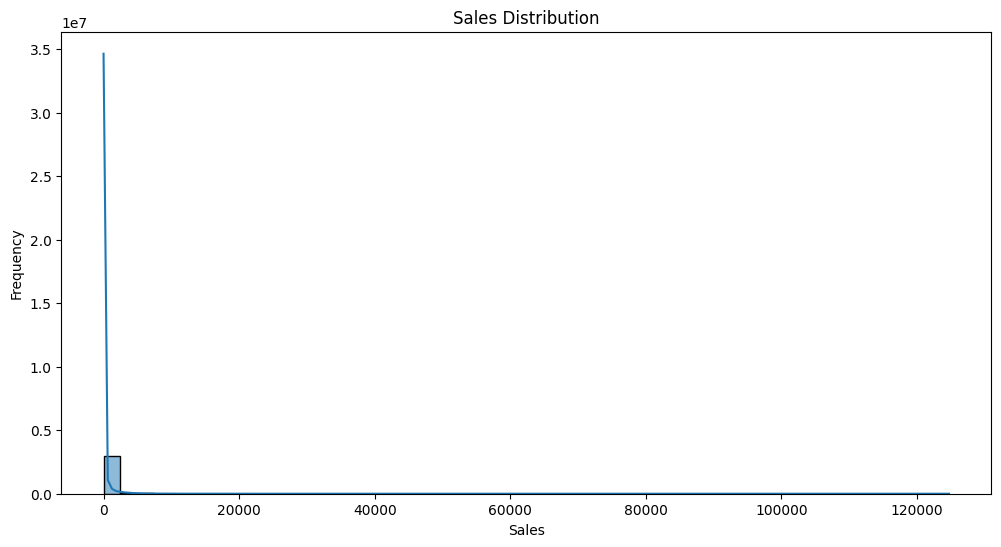

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df["sales"], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


### Sales During Holidays vs. Non-Holidays

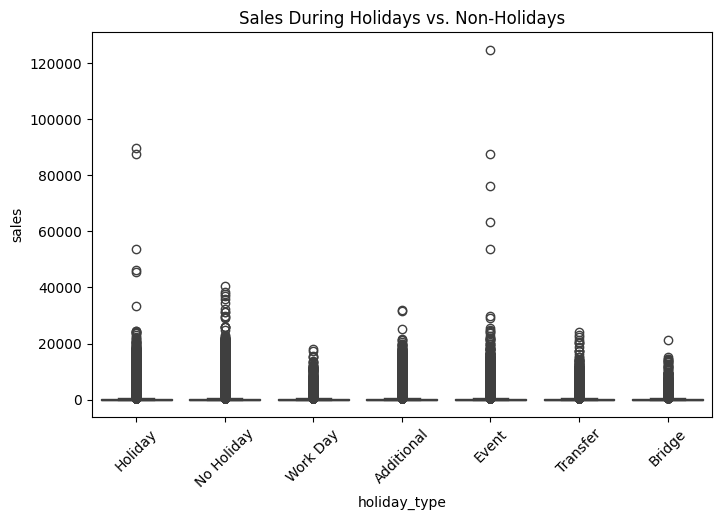

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["holiday_type"], y=train_df["sales"])
plt.title("Sales During Holidays vs. Non-Holidays")
plt.xticks(rotation=45)
plt.show()

# Model Training (SVM & LSTM)

In [50]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [54]:
# Select Features (Drop Target 'sales' from Input)
X = train_df.drop(columns=["sales"])  # Features (Independent Variables)
y = train_df["sales"]  # Target (Dependent Variable)

In [55]:

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [56]:
# Print Shape of Train/Test Sets
print("Train Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)

Train Data Shape: (2443478, 18) (2443478,)
Test Data Shape: (610870, 18) (610870,)


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [59]:
# Identify non-numeric columns
categorical_columns = X_train.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['holiday_type', 'city', 'state'], dtype='object')


In [60]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical features
le = LabelEncoder()
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use same encoder for test set

In [62]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [63]:

# Standardize Features (SGD is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Define SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, learning_rate='adaptive', random_state=42)

In [65]:
# Train Model
print("Training SGDRegressor...")
sgd_model.fit(X_train_scaled, y_train)

Training SGDRegressor...


SGDRegressor(learning_rate='adaptive', random_state=42)

In [66]:
# Predict on Test Set
y_pred_sgd = sgd_model.predict(X_test_scaled)

In [67]:
# Evaluate Performance
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print(f"✅ SGDRegressor Mean Squared Error: {mse_sgd:.4f}")

✅ SGDRegressor Mean Squared Error: 808277.1824


In [76]:
from sklearn.model_selection import train_test_split

# Select Features (Drop target 'sales' from input)
X = train_df.drop(columns=["sales"])  # Input Features
y = train_df["sales"]  # Target variable

In [77]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
from sklearn.linear_model import SGDRegressor

# Use SGD Regressor (Faster than SVR)
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

# Train Model
sgd_model.fit(X_train_scaled, y_train)

In [48]:
# Print Shape of Train/Test Sets
print("Train Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)

Train Data Shape: (2443478, 18) (2443478,)
Test Data Shape: (610870, 18) (610870,)


# Train Support Vector Machine (SVM)

In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [50]:
# Identify non-numeric columns
categorical_columns = X_train.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['holiday_type', 'city', 'state'], dtype='object')


In [51]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical features
le = LabelEncoder()
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use same encoder for test set

In [52]:
# Scale the Features (SVM is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train_scaled, X_test_scaled

(array([[-1.70014094, -0.15470484, -0.30412338, ..., -0.62027369,
          1.41432513, -0.28282046],
        [-1.70014094, -0.15470484, -0.30412338, ..., -0.62027369,
          1.41432513, -0.28282046],
        [-1.70014094, -0.15470484, -0.30412338, ..., -0.62027369,
          1.41432513, -0.28282046],
        ...,
        [-0.54523718, -0.15470484, -0.56794905, ...,  1.61219155,
         -0.707051  , -0.28282046],
        [-0.54523718, -0.15470484, -0.56794905, ...,  1.61219155,
         -0.707051  , -0.28282046],
        [-0.54523718,  0.67922886, -0.56794905, ...,  1.61219155,
         -0.707051  , -0.28282046]]),
 array([[-0.54523718, -0.15470484, -0.56794905, ...,  1.61219155,
         -0.707051  , -0.28282046],
        [-0.54523718, -0.15470484, -0.56794905, ...,  1.61219155,
         -0.707051  , -0.28282046],
        [-0.54523718, -0.15470484, -0.56794905, ...,  1.61219155,
         -0.707051  , -0.28282046],
        ...,
        [-1.18685038, 15.27306868,  0.5231818 , ..., -

### Use tqdm to Track Progress

In [ ]:
from sklearn.svm import SVR
from tqdm import tqdm
import numpy as np

# Define SVM model
svm_model = SVR(kernel="rbf")

# Train model with tqdm progress bar
for i in tqdm(range(1, 101), desc="Training SVM"):
    sample_size = int(len(X_train_scaled) * (i / 100))  # Increase training data gradually
    svm_model.fit(X_train_scaled[:sample_size], y_train[:sample_size])

In [ ]:
# Predict Sales
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate Model Performance
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("SVM Model Mean Squared Error:", mse_svm)

# Train LSTM (Deep Learning)

#### Reshape Data for LSTM

In [68]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Scale Target Variable for LSTM
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape Data for LSTM (3D format: samples, time-steps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print("LSTM Input Shape:", X_train_lstm.shape)


LSTM Input Shape: (2443478, 1, 18)


####  Build and Train LSTM Model

In [69]:
# Build LSTM Model
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])

# Compile Model
lstm_model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=10, batch_size=32)

# Predict Sales with LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Inverse Transform Predictions
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)

# Evaluate Model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("LSTM Model Mean Squared Error:", mse_lstm)


Epoch 1/10


/opt/anaconda3/envs/Data_Science/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76359/76359 ━━━━━━━━━━━━━━━━━━━━ 73s 940us/step - loss: 0.0432 
Epoch 2/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 73s 951us/step - loss: 0.0136 
Epoch 3/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 68s 890us/step - loss: 0.0085 
Epoch 4/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 68s 887us/step - loss: 0.0133 
Epoch 5/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 69s 901us/step - loss: 0.0110     
Epoch 6/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 68s 890us/step - loss: 0.0058 
Epoch 7/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 68s 890us/step - loss: 0.0035 
Epoch 8/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 68s 896us/step - loss: 0.0034     
Epoch 9/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 68s 894us/step - loss: 0.0035     
Epoch 10/10
76359/76359 ━━━━━━━━━━━━━━━━━━━━ 68s 895us/step - loss: 0.0052     
19090/19090 ━━━━━━━━━━━━━━━━━━━━ 6s 319us/step
LSTM Model Mean Squared Error: 11396.67383192284


# Compare LSTM vs. SGDRegressor

In [70]:
print(f"SGDRegressor MSE: {mse_sgd:.4f}")
print(f"LSTM Model MSE: {mse_lstm:.4f}")

SGDRegressor MSE: 808277.1824
LSTM Model MSE: 11396.6738


# Visualization: SGD vs. LSTM Predictions

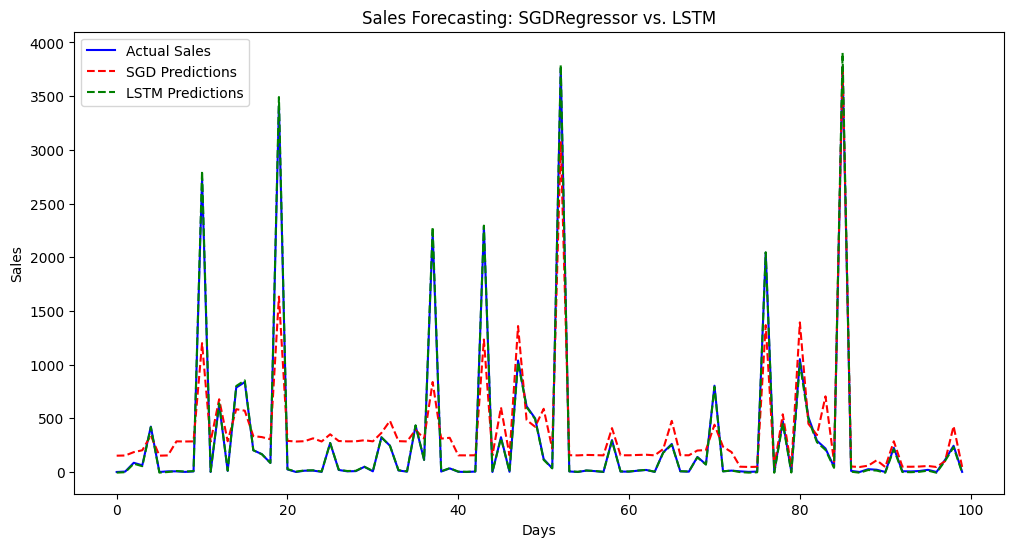

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Actual Sales
plt.plot(y_test.values[:100], label="Actual Sales", color="blue")

# Plot SGDRegressor Predictions
plt.plot(y_pred_sgd[:100], label="SGD Predictions", linestyle="dashed", color="red")

# Plot LSTM Predictions
plt.plot(y_pred_lstm[:100], label="LSTM Predictions", linestyle="dashed", color="green")

plt.title("Sales Forecasting: SGDRegressor vs. LSTM")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.legend()
plt.show()


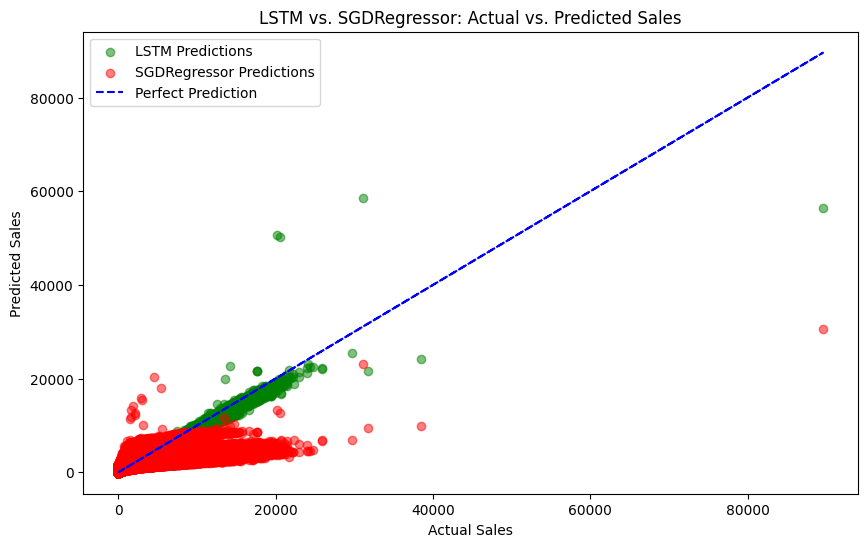

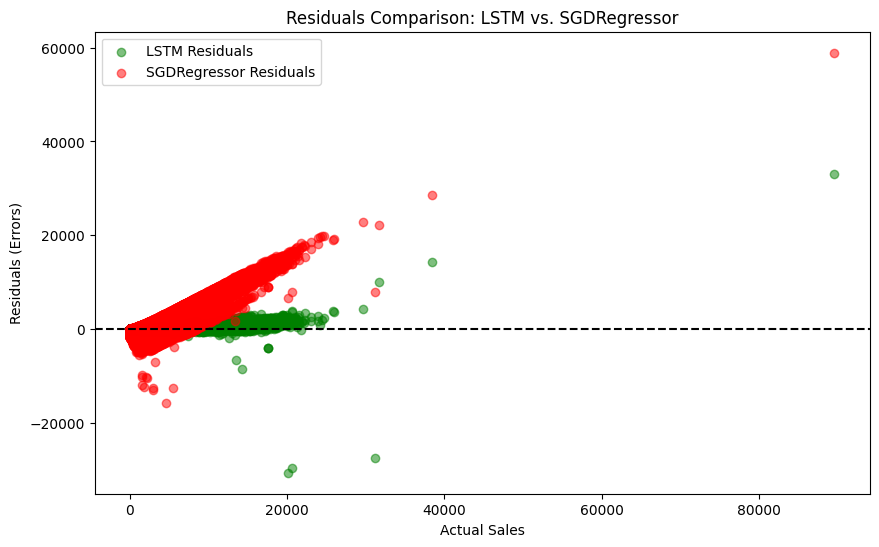

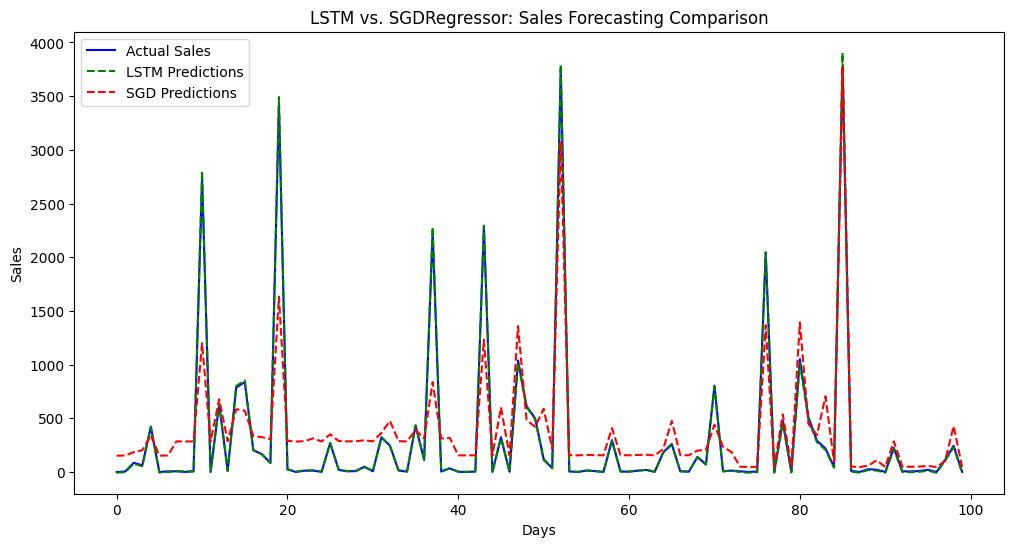

In [74]:
import matplotlib.pyplot as plt

# Ensure y_test is reshaped properly for LSTM comparison
y_test_array = y_test.values if hasattr(y_test, "values") else y_test

# Scatter Plot: LSTM vs. SGDRegressor Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_lstm.flatten(), alpha=0.5, color="green", label="LSTM Predictions")
plt.scatter(y_test_array, y_pred_sgd, alpha=0.5, color="red", label="SGDRegressor Predictions")
plt.plot(y_test_array, y_test_array, color="blue", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("LSTM vs. SGDRegressor: Actual vs. Predicted Sales")
plt.legend()
plt.show()

# Residual Plot: LSTM vs. SGDRegressor (Errors)
plt.figure(figsize=(10, 6))
residuals_lstm = y_test_array - y_pred_lstm.flatten()
residuals_sgd = y_test_array - y_pred_sgd

plt.scatter(y_test_array, residuals_lstm, alpha=0.5, color="green", label="LSTM Residuals")
plt.scatter(y_test_array, residuals_sgd, alpha=0.5, color="red", label="SGDRegressor Residuals")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Residuals (Errors)")
plt.title("Residuals Comparison: LSTM vs. SGDRegressor")
plt.legend()
plt.show()

# Line Plot: Compare LSTM & SGD Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_array[:100], label="Actual Sales", color="blue")
plt.plot(y_pred_lstm[:100], label="LSTM Predictions", linestyle="dashed", color="green")
plt.plot(y_pred_sgd[:100], label="SGD Predictions", linestyle="dashed", color="red")
plt.title("LSTM vs. SGDRegressor: Sales Forecasting Comparison")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.legend()
plt.show()
